In [8]:
#R

In [9]:
library(dplyr)
library(vegan)
library(tidyr)

In [10]:
file_path <- "data/ssusa/cleaned_snapshot_usa_iucn.csv"

if (!file.exists(file_path)) {
    stop("File not found: ", file_path)
}

df <- read.csv(file_path, stringsAsFactors = FALSE)


In [11]:
str(df)

'data.frame':	698887 obs. of  26 variables:
 $ Year             : int  2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 ...
 $ Project          : chr  "Snapshot USA 2019" "Snapshot USA 2019" "Snapshot USA 2019" "Snapshot USA 2019" ...
 $ Camera_Trap_Array: chr  "Crupi" "Crupi" "Crupi" "Crupi" ...
 $ Deployment_ID    : chr  "AK_Forest_Chilkat_Preserve_1" "AK_Forest_Chilkat_Preserve_1" "AK_Forest_Chilkat_Preserve_1" "AK_Forest_Chilkat_Preserve_1" ...
 $ Sequence_ID      : chr  "d58722s1" "d58722s2" "d58722s3" "d58722s4" ...
 $ Start_Time       : chr  "2019-08-31 06:50:00" "2019-08-31 14:15:00" "2019-08-31 18:22:00" "2019-08-31 20:58:00" ...
 $ End_Time         : chr  "2019-08-31 06:50:00" "2019-08-31 14:17:00" "2019-08-31 18:22:00" "2019-08-31 20:58:00" ...
 $ Class            : chr  "mammalia" "mammalia" "mammalia" "mammalia" ...
 $ Order            : chr  "carnivora" "carnivora" "carnivora" "carnivora" ...
 $ Family           : chr  "ursidae" "ursidae" "ursidae" "ursidae" ...
 $ Genus

In [12]:
head(df)

,Year,Project,Camera_Trap_Array,Deployment_ID,Sequence_ID,Start_Time,End_Time,Class,Order,Family,⋯,Group_Size,Site_Name,Start_Date,End_Date,Survey_Nights,Latitude,Longitude,Habitat,Development_Level,Feature_Type
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s1,2019-08-31 06:50:00,2019-08-31 06:50:00,mammalia,carnivora,ursidae,⋯,1,AK_Forest_Crupi_21_dep_01,2019-08-31,2019-11-03,64,59.42643,-136.2225,forest,wild,water source
2,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s2,2019-08-31 14:15:00,2019-08-31 14:17:00,mammalia,carnivora,ursidae,⋯,1,AK_Forest_Crupi_21_dep_01,2019-08-31,2019-11-03,64,59.42643,-136.2225,forest,wild,water source
3,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s3,2019-08-31 18:22:00,2019-08-31 18:22:00,mammalia,carnivora,ursidae,⋯,1,AK_Forest_Crupi_21_dep_01,2019-08-31,2019-11-03,64,59.42643,-136.2225,forest,wild,water source
4,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s4,2019-08-31 20:58:00,2019-08-31 20:58:00,mammalia,carnivora,ursidae,⋯,1,AK_Forest_Crupi_21_dep_01,2019-08-31,2019-11-03,64,59.42643,-136.2225,forest,wild,water source
5,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s4,2019-08-31 20:58:00,2019-08-31 20:58:00,mammalia,carnivora,ursidae,⋯,2,AK_Forest_Crupi_21_dep_01,2019-08-31,2019-11-03,64,59.42643,-136.2225,forest,wild,water source
6,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s5,2019-09-02 19:18:00,2019-09-02 19:18:00,mammalia,carnivora,ursidae,⋯,1,AK_Forest_Crupi_21_dep_01,2019-08-31,2019-11-03,64,59.42643,-136.2225,forest,wild,water source


In [13]:
years_per_array <- df %>%
  mutate(.year = Year) %>%
  filter(!is.na(.year), !is.na(Camera_Trap_Array), Camera_Trap_Array != "") %>%
  group_by(Camera_Trap_Array) %>%
  summarise(Years = paste(sort(unique(.year)), collapse = ", "), .groups = "drop")

head(years_per_array)

Camera_Trap_Array,Years
<chr>,<chr>
ARNWR,"2020, 2021, 2022"
AandM,2022
Abilene,"2019, 2020, 2021, 2022, 2023"
AbitaFlats,2021
Afognak,2022
Ahlers,"2022, 2023"


In [14]:
arrays_5_years <- years_per_array %>%
    mutate(YearCount = lengths(strsplit(Years, ",\\s*"))) %>%
    filter(YearCount == 5)

arrays_5_years

Camera_Trap_Array,Years,YearCount
<chr>,<chr>,<int>
Abilene,"2019, 2020, 2021, 2022, 2023",5
Angelina,"2019, 2020, 2021, 2022, 2023",5
Ardmore,"2019, 2020, 2021, 2022, 2023",5
Baggs,"2019, 2020, 2021, 2022, 2023",5
Bogan,"2019, 2020, 2021, 2022, 2023",5
BridgewaterState,"2019, 2020, 2021, 2022, 2023",5
Brooke,"2019, 2020, 2021, 2022, 2023",5
Brookings,"2019, 2020, 2021, 2022, 2023",5
BullShoals,"2019, 2020, 2021, 2022, 2023",5


In [15]:
# Filter df to only rows whose Camera_Trap_Array is in arrays_5_years
arrays_to_keep <- arrays_5_years$Camera_Trap_Array
df_arrays_5_years <- df %>% filter(Camera_Trap_Array %in% arrays_to_keep)

In [16]:
# Extract month from End_Date column
df_arrays_5_years <- df_arrays_5_years %>%
    mutate(Month = format(as.Date(End_Date), "%m"))

In [17]:
head(df_arrays_5_years)

,Year,Project,Camera_Trap_Array,Deployment_ID,Sequence_ID,Start_Time,End_Time,Class,Order,Family,⋯,Site_Name,Start_Date,End_Date,Survey_Nights,Latitude,Longitude,Habitat,Development_Level,Feature_Type,Month
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s1,2019-08-31 06:50:00,2019-08-31 06:50:00,mammalia,carnivora,ursidae,⋯,AK_Forest_Crupi_21_dep_01,2019-08-31,2019-11-03,64,59.42643,-136.2225,forest,wild,water source,11
2,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s2,2019-08-31 14:15:00,2019-08-31 14:17:00,mammalia,carnivora,ursidae,⋯,AK_Forest_Crupi_21_dep_01,2019-08-31,2019-11-03,64,59.42643,-136.2225,forest,wild,water source,11
3,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s3,2019-08-31 18:22:00,2019-08-31 18:22:00,mammalia,carnivora,ursidae,⋯,AK_Forest_Crupi_21_dep_01,2019-08-31,2019-11-03,64,59.42643,-136.2225,forest,wild,water source,11
4,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s4,2019-08-31 20:58:00,2019-08-31 20:58:00,mammalia,carnivora,ursidae,⋯,AK_Forest_Crupi_21_dep_01,2019-08-31,2019-11-03,64,59.42643,-136.2225,forest,wild,water source,11
5,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s4,2019-08-31 20:58:00,2019-08-31 20:58:00,mammalia,carnivora,ursidae,⋯,AK_Forest_Crupi_21_dep_01,2019-08-31,2019-11-03,64,59.42643,-136.2225,forest,wild,water source,11
6,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s5,2019-09-02 19:18:00,2019-09-02 19:18:00,mammalia,carnivora,ursidae,⋯,AK_Forest_Crupi_21_dep_01,2019-08-31,2019-11-03,64,59.42643,-136.2225,forest,wild,water source,11


In [18]:
# Build a species accumulation curve for one camera trap array

# Pick an array (here: the one with the most records among the 5-year arrays)
selected_array <- df_arrays_5_years %>%
    count(Camera_Trap_Array, name = "n") %>%
    arrange(desc(n)) %>%
    slice(1) %>%
    pull(Camera_Trap_Array)

cat("Selected Camera_Trap_Array:", selected_array, "\n")

Selected Camera_Trap_Array: Herrera 


In [19]:
# Manual Select Camera Trap Array
# selected_array <- "Mianus"

In [20]:
# Subset data for that array
df_array <- df_arrays_5_years %>%
    filter(Camera_Trap_Array == selected_array)

# Identify a species column
species_col <- c("Sci_Name")

# Create occurrence (presence/absence) matrix by Year
occurrence <- df_array %>%
    filter(!is.na(.data[[species_col]]), .data[[species_col]] != "", !is.na(Year)) %>%
    distinct(Year, .data[[species_col]]) %>%
    mutate(value = 1) %>%
    pivot_wider(names_from = !!rlang::sym(species_col),
                            values_from = value,
                            values_fill = 0) %>%
    arrange(Year)

mat <- as.data.frame(occurrence)
row_names <- mat$Year
mat$Year <- NULL
rownames(mat) <- row_names

if (ncol(mat) < 1) stop("No species columns created; check filtering logic.")

In [21]:
mat

,sciurus carolinensis,odocoileus virginianus,procyon lotor,vulpes vulpes,canis latrans,didelphis virginiana,lynx rufus,marmota monax,sylvilagus floridanus,tamias striatus,peromyscus leucopus,sciurus niger,castor canadensis,glaucomys volans,urocyon cinereoargenteus,glaucomys sabrinus,neogale frenata
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2019,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0
2020,1,1,1,1,0,1,0,1,1,1,1,1,0,0,0,0,0
2021,1,1,1,1,1,1,0,1,1,1,0,0,1,1,1,0,0
2022,1,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,0
2023,1,1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,1


'nperm' >= set of all permutations: complete enumeration.

Set of permutations < 'minperm'. Generating entire set.



Observed richness: 17 


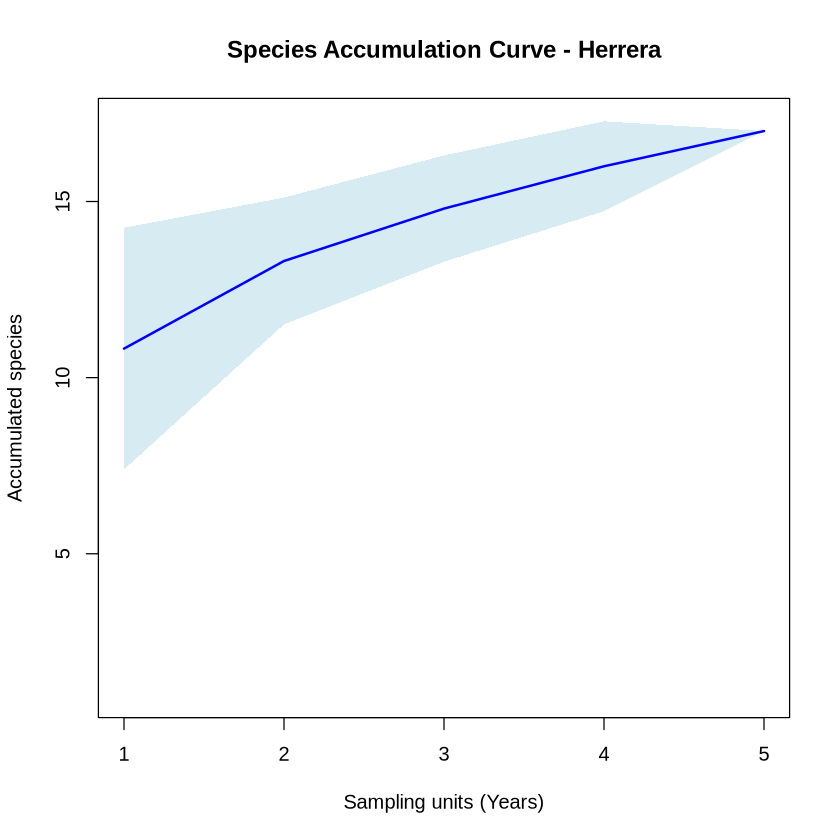

In [22]:
# Species accumulation (randomized)
set.seed(42)
acc <- specaccum(mat, method = "random", permutations = 1000)

# Plot
plot(
    acc,
    ci.type = "poly",
    col = "blue",
    lwd = 2,
    ci.lty = 0,
    ci.col = adjustcolor("lightblue", 0.5),
    xlab = "Sampling units (Years)",
    ylab = "Accumulated species",
    main = paste("Species Accumulation Curve -", selected_array)
)

# Simple richness estimate
cat("Observed richness:", tail(acc$richness, 1), "\n")

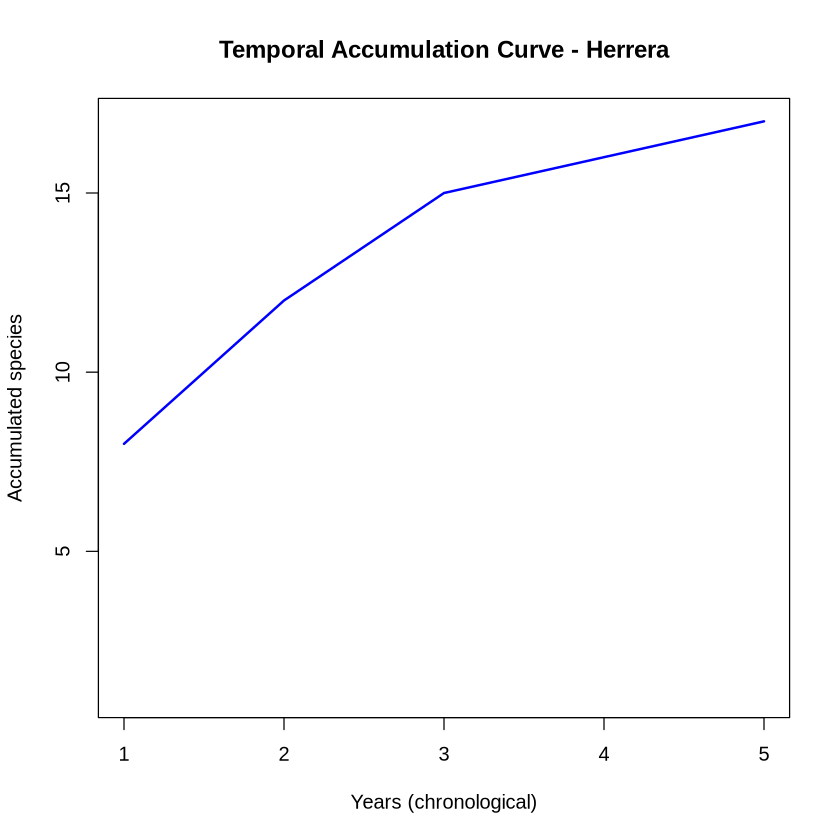

In [23]:
acc_time <- specaccum(mat, method = "collector")   # mat already sorted by Year
plot(
  acc_time,
  xlab = "Years (chronological)",
  ylab = "Accumulated species",
  main = paste("Temporal Accumulation Curve -", selected_array),
  col = "blue", lwd = 2
)


In [24]:
acc500  <- specaccum(mat, method="random", permutations=500)
acc1000 <- specaccum(mat, method="random", permutations=1000)
max(abs(acc500$richness - acc1000$richness))


'nperm' >= set of all permutations: complete enumeration.

Set of permutations < 'minperm'. Generating entire set.

'nperm' >= set of all permutations: complete enumeration.



Set of permutations < 'minperm'. Generating entire set.



[1] 0

'nperm' >= set of all permutations: complete enumeration.

Set of permutations < 'minperm'. Generating entire set.



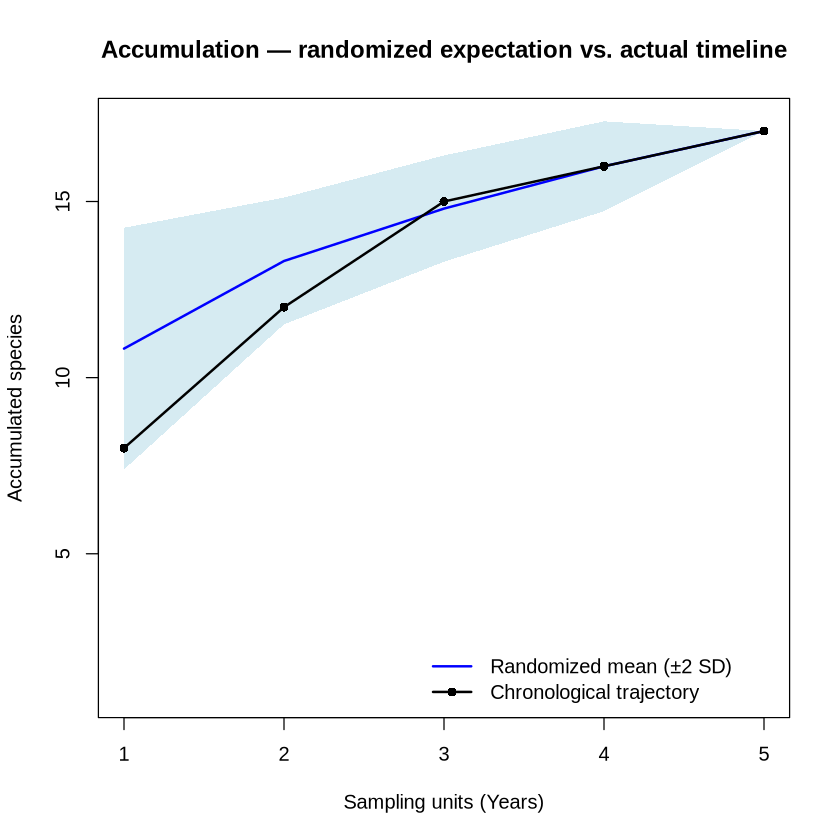

In [25]:
acc_rand <- specaccum(mat, method = "random", permutations = 1000)
acc_time <- specaccum(mat, method = "collector")

plot(
  acc_rand, ci.type = "poly", ci.lty = 0,
  ci.col = adjustcolor("lightblue", 0.5),
  col = "blue", lwd = 2,
  xlab = "Sampling units (Years)",
  ylab = "Accumulated species",
  main = "Accumulation — randomized expectation vs. actual timeline"
)
lines(acc_time$sites, acc_time$richness, lwd = 2, col = "black")  # chronological overlay
points(acc_time$sites, acc_time$richness, pch = 16)
legend("bottomright",
       c("Randomized mean (±2 SD)", "Chronological trajectory"),
       lwd = c(2, 2), col = c("blue", "black"), pch = c(NA, 16), bty = "n")


In [26]:
# Build a species accumulation curve for one camera trap array (by Year-Month)

# Subset data for that array
df_array <- df_arrays_5_years %>%
    filter(Camera_Trap_Array == selected_array)

# Identify a species column
species_col <- c("Sci_Name")

# Create occurrence (presence/absence) matrix by Year and Month
occurrence <- df_array %>%
    filter(!is.na(.data[[species_col]]), .data[[species_col]] != "", !is.na(Year), !is.na(Month)) %>%
    mutate(Year_Month = paste(Year, Month, sep = "-")) %>%
    distinct(Year_Month, .data[[species_col]]) %>%
    mutate(value = 1) %>%
    pivot_wider(names_from = !!rlang::sym(species_col),
                            values_from = value,
                            values_fill = 0) %>%
    arrange(Year_Month)

mat <- as.data.frame(occurrence)
row_names <- mat$Year_Month
mat$Year_Month <- NULL
rownames(mat) <- row_names

if (ncol(mat) < 1) stop("No species columns created; check filtering logic.")

In [27]:
mat

,sciurus carolinensis,odocoileus virginianus,procyon lotor,vulpes vulpes,canis latrans,didelphis virginiana,lynx rufus,marmota monax,sylvilagus floridanus,tamias striatus,peromyscus leucopus,sciurus niger,castor canadensis,glaucomys volans,urocyon cinereoargenteus,glaucomys sabrinus,neogale frenata
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2019-09,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-10,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2019-11,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
2020-09,1,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0
2020-10,1,1,1,1,0,1,0,0,1,1,1,1,0,0,0,0,0
2021-10,1,1,1,1,1,1,0,1,1,1,0,0,1,0,0,0,0
2021-11,1,1,1,1,1,1,0,1,1,1,0,0,0,1,1,0,0
2022-10,1,1,1,1,1,1,0,1,1,1,1,1,0,1,0,0,0
2022-11,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0,1,0


Observed richness: 17 


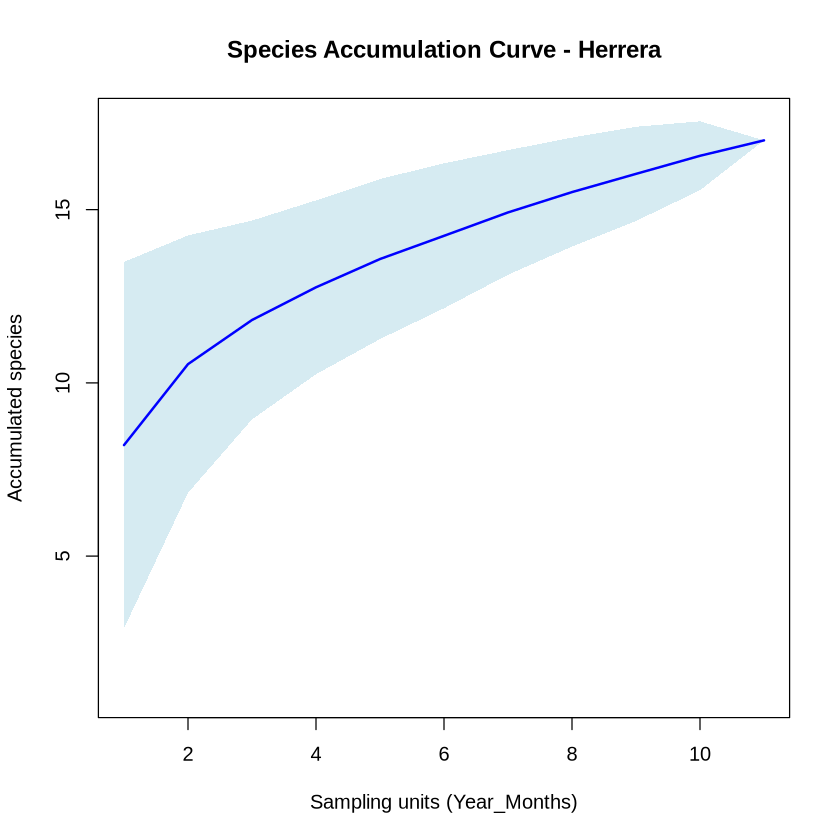

In [28]:
# Species accumulation (randomized)
set.seed(42)
acc <- specaccum(mat, method = "random", permutations = 1000)

# Plot
plot(
    acc,
    ci.type = "poly",
    col = "blue",
    lwd = 2,
    ci.lty = 0,
    ci.col = adjustcolor("lightblue", 0.5),
    xlab = "Sampling units (Year_Months)",
    ylab = "Accumulated species",
    main = paste("Species Accumulation Curve -", selected_array)
)

# Simple richness estimate
cat("Observed richness:", tail(acc$richness, 1), "\n")

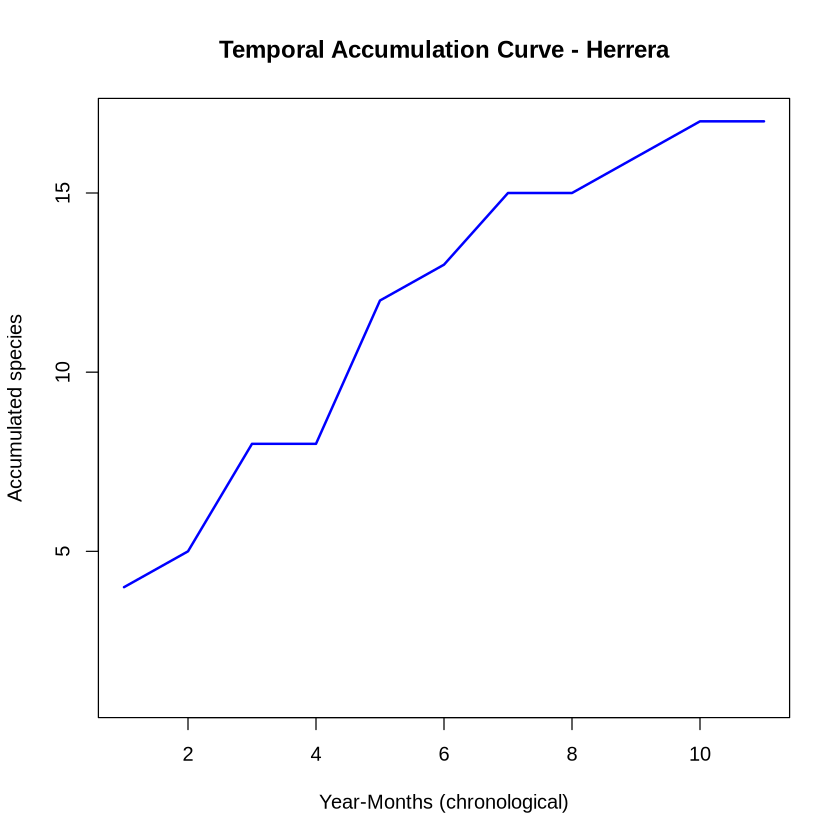

In [29]:
acc_time <- specaccum(mat, method = "collector")   # mat already sorted by Year-Month
plot(
  acc_time,
  xlab = "Year-Months (chronological)",
  ylab = "Accumulated species",
  main = paste("Temporal Accumulation Curve -", selected_array),
  col = "blue", lwd = 2
)


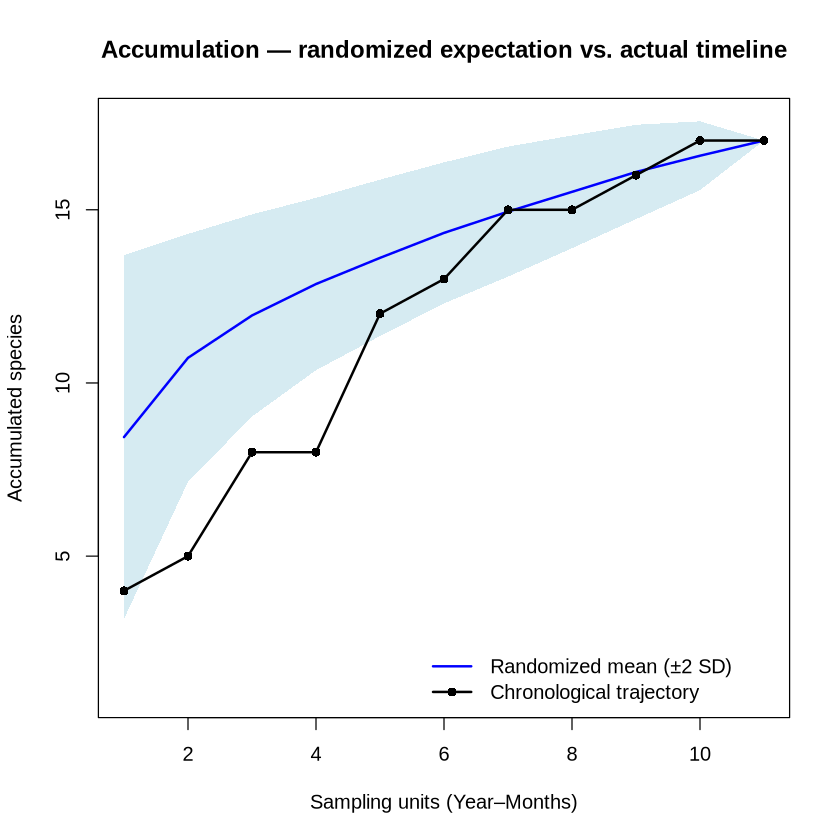

In [30]:
acc_rand <- specaccum(mat, method = "random", permutations = 1000)
acc_time <- specaccum(mat, method = "collector")

plot(
  acc_rand, ci.type = "poly", ci.lty = 0,
  ci.col = adjustcolor("lightblue", 0.5),
  col = "blue", lwd = 2,
  xlab = "Sampling units (Year–Months)",
  ylab = "Accumulated species",
  main = "Accumulation — randomized expectation vs. actual timeline"
)
lines(acc_time$sites, acc_time$richness, lwd = 2, col = "black")  # chronological overlay
points(acc_time$sites, acc_time$richness, pch = 16)
legend("bottomright",
       c("Randomized mean (±2 SD)", "Chronological trajectory"),
       lwd = c(2, 2), col = c("blue", "black"), pch = c(NA, 16), bty = "n")


In [31]:
# Create occurrence matrix by individual occurrence (sorted by End_Time)
occurrence_individual <- df_array %>%
    filter(!is.na(.data[[species_col]]), .data[[species_col]] != "", !is.na(End_Time)) %>%
    arrange(End_Time) %>%
    mutate(Occurrence_ID = row_number()) %>%
    select(Occurrence_ID, !!rlang::sym(species_col)) %>%
    mutate(value = 1) %>%
    pivot_wider(names_from = !!rlang::sym(species_col),
                values_from = value,
                values_fill = 0)

mat_individual <- as.data.frame(occurrence_individual)
row_names <- mat_individual$Occurrence_ID
mat_individual$Occurrence_ID <- NULL
rownames(mat_individual) <- row_names

cat("Total occurrences:", nrow(mat_individual), "\n")

Total occurrences: 36618 


In [32]:
head(mat_individual)

,sciurus carolinensis,odocoileus virginianus,vulpes vulpes,procyon lotor,marmota monax,canis latrans,didelphis virginiana,lynx rufus,sylvilagus floridanus,tamias striatus,peromyscus leucopus,sciurus niger,castor canadensis,urocyon cinereoargenteus,glaucomys volans,glaucomys sabrinus,neogale frenata
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
# Species accumulation (randomized)
# set.seed(42)
# acc <- specaccum(mat_individual, method = "random", permutations = 1000)

# # Plot
# plot(
#     acc,
#     ci.type = "poly",
#     col = "blue",
#     lwd = 2,
#     ci.lty = 0,
#     ci.col = adjustcolor("lightblue", 0.5),
#     xlab = "Sampling units (occurrences)",
#     ylab = "Accumulated species",
#     main = paste("Species Accumulation Curve -", selected_array)
# )

# # Simple richness estimate
# cat("Observed richness:", tail(acc$richness, 1), "\n")

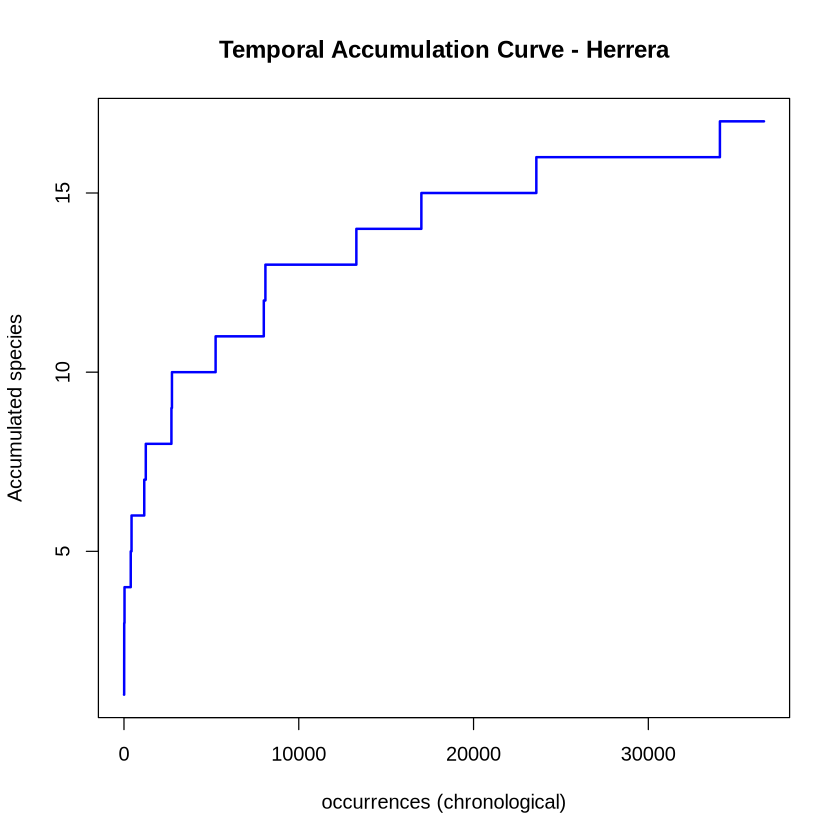

In [34]:
acc_time <- specaccum(mat_individual, method = "collector")   # mat_individual already sorted by time
plot(
  acc_time,
  xlab = "occurrences (chronological)",
  ylab = "Accumulated species",
  main = paste("Temporal Accumulation Curve -", selected_array),
  col = "blue", lwd = 2
)


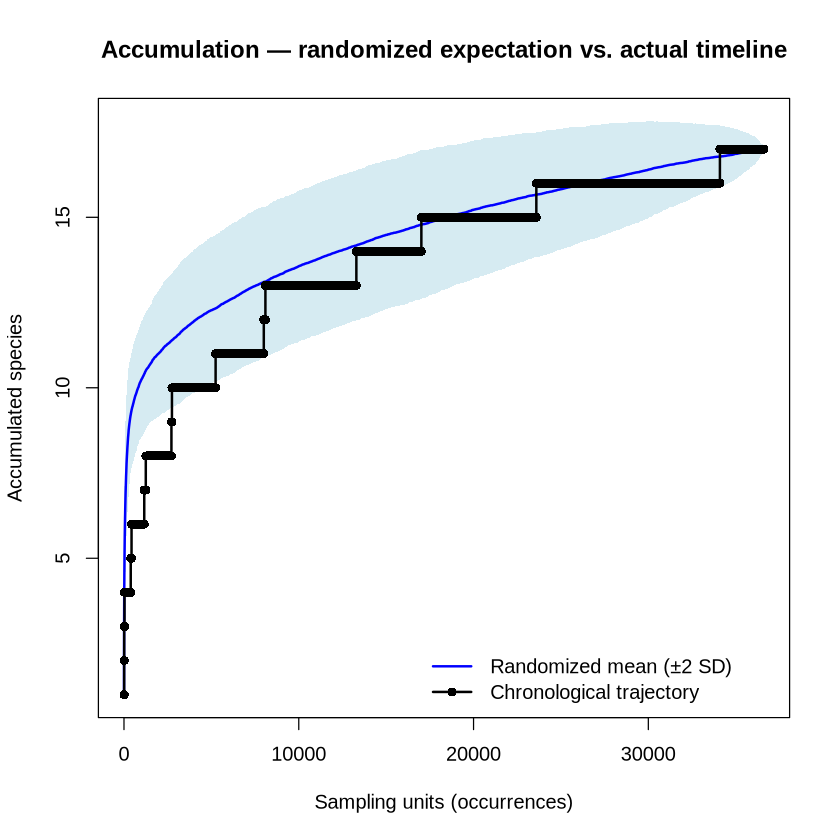

In [35]:
acc_rand <- specaccum(mat_individual, method = "random", permutations = 1000)
acc_time <- specaccum(mat_individual, method = "collector")

plot(
  acc_rand, ci.type = "poly", ci.lty = 0,
  ci.col = adjustcolor("lightblue", 0.5),
  col = "blue", lwd = 2,
  xlab = "Sampling units (occurrences)",
  ylab = "Accumulated species",
  main = "Accumulation — randomized expectation vs. actual timeline"
)
lines(acc_time$sites, acc_time$richness, lwd = 2, col = "black")  # chronological overlay
points(acc_time$sites, acc_time$richness, pch = 16)
legend("bottomright",
       c("Randomized mean (±2 SD)", "Chronological trajectory"),
       lwd = c(2, 2), col = c("blue", "black"), pch = c(NA, 16), bty = "n")


In [36]:
head(df_array)

,Year,Project,Camera_Trap_Array,Deployment_ID,Sequence_ID,Start_Time,End_Time,Class,Order,Family,⋯,Site_Name,Start_Date,End_Date,Survey_Nights,Latitude,Longitude,Habitat,Development_Level,Feature_Type,Month
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,2019,D.C. Wildlife Project,Herrera,HF0403,d62668s2,2019-10-28 11:28:00,2019-10-28 11:28:00,mammalia,rodentia,sciuridae,⋯,HF0403,2019-10-28,2019-11-12,15,38.9262,-77.08312,anthropogenic,urban,,11
2,2019,D.C. Wildlife Project,Herrera,HF0403,d62668s3,2019-10-28 13:17:00,2019-10-28 13:17:00,mammalia,rodentia,sciuridae,⋯,HF0403,2019-10-28,2019-11-12,15,38.9262,-77.08312,anthropogenic,urban,,11
3,2019,D.C. Wildlife Project,Herrera,HF0403,d62668s4,2019-10-28 19:45:00,2019-10-28 19:46:00,mammalia,cetartiodactyla,cervidae,⋯,HF0403,2019-10-28,2019-11-12,15,38.9262,-77.08312,anthropogenic,urban,,11
4,2019,D.C. Wildlife Project,Herrera,HF0403,d62668s5,2019-10-28 22:37:00,2019-10-28 22:39:00,mammalia,cetartiodactyla,cervidae,⋯,HF0403,2019-10-28,2019-11-12,15,38.9262,-77.08312,anthropogenic,urban,,11
5,2019,D.C. Wildlife Project,Herrera,HF0403,d62668s6,2019-10-29 01:21:00,2019-10-29 01:22:00,mammalia,cetartiodactyla,cervidae,⋯,HF0403,2019-10-28,2019-11-12,15,38.9262,-77.08312,anthropogenic,urban,,11
6,2019,D.C. Wildlife Project,Herrera,HF0403,d62668s7,2019-10-29 01:30:00,2019-10-29 01:30:00,mammalia,cetartiodactyla,cervidae,⋯,HF0403,2019-10-28,2019-11-12,15,38.9262,-77.08312,anthropogenic,urban,,11


In [37]:
# Select the deployment with the most records
selected_id <- df_array %>%
    count(Deployment_ID, name = "n") %>%
    arrange(desc(n)) %>%
    slice(1) %>%
    pull(Deployment_ID)

cat("Selected Deployment_ID:", selected_id, "\n")
cat("Number of records:", df_array %>% filter(Deployment_ID == selected_id) %>% nrow(), "\n")

Selected Deployment_ID: DC_BerkshirePark 10/08/2021 
Number of records: 650 


In [38]:
selected_id <- "HF0403"

In [39]:
# Create occurrence matrix for selected deployment, grouped by date
# df_deployment <- df_array
df_deployment <- df_array %>%
    filter(Deployment_ID == selected_id)

occurrence_by_date <- df_deployment %>%
    filter(!is.na(.data[[species_col]]), .data[[species_col]] != "", !is.na(End_Time)) %>%
    mutate(Date = as.Date(End_Time)) %>%
    distinct(Date, .data[[species_col]]) %>%
    mutate(value = 1) %>%
    pivot_wider(names_from = !!rlang::sym(species_col),
                values_from = value,
                values_fill = 0) %>%
    arrange(Date)

mat_site <- as.data.frame(occurrence_by_date)
row_names <- mat_site$Date
mat_site$Date <- NULL
rownames(mat_site) <- row_names

cat("Total dates:", nrow(mat_site), "\n")

Total dates: 15 


In [40]:
mat_site

,sciurus carolinensis,odocoileus virginianus,procyon lotor,vulpes vulpes
,<dbl>,<dbl>,<dbl>,<dbl>
2019-10-28,1,1,0,0
2019-10-29,1,1,0,0
2019-10-30,1,1,0,0
2019-11-01,1,1,0,0
2019-11-02,1,1,0,0
2019-11-03,1,1,1,0
2019-11-04,1,1,1,0
2019-11-05,0,1,0,1
2019-11-06,1,1,1,0


Observed richness: 4 


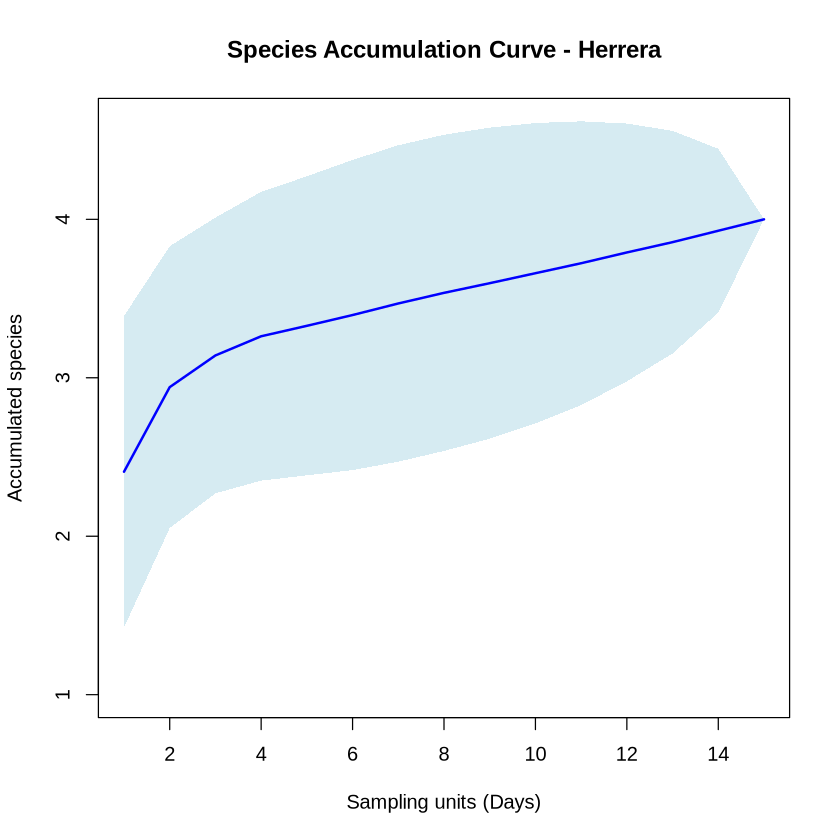

In [41]:
# Species accumulation (randomized)
set.seed(42)
acc <- specaccum(mat_site, method = "random", permutations = 1000)

# Plot
plot(
    acc,
    ci.type = "poly",
    col = "blue",
    lwd = 2,
    ci.lty = 0,
    ci.col = adjustcolor("lightblue", 0.5),
    xlab = "Sampling units (Days)",
    ylab = "Accumulated species",
    main = paste("Species Accumulation Curve -", selected_array)
)

# Simple richness estimate
cat("Observed richness:", tail(acc$richness, 1), "\n")

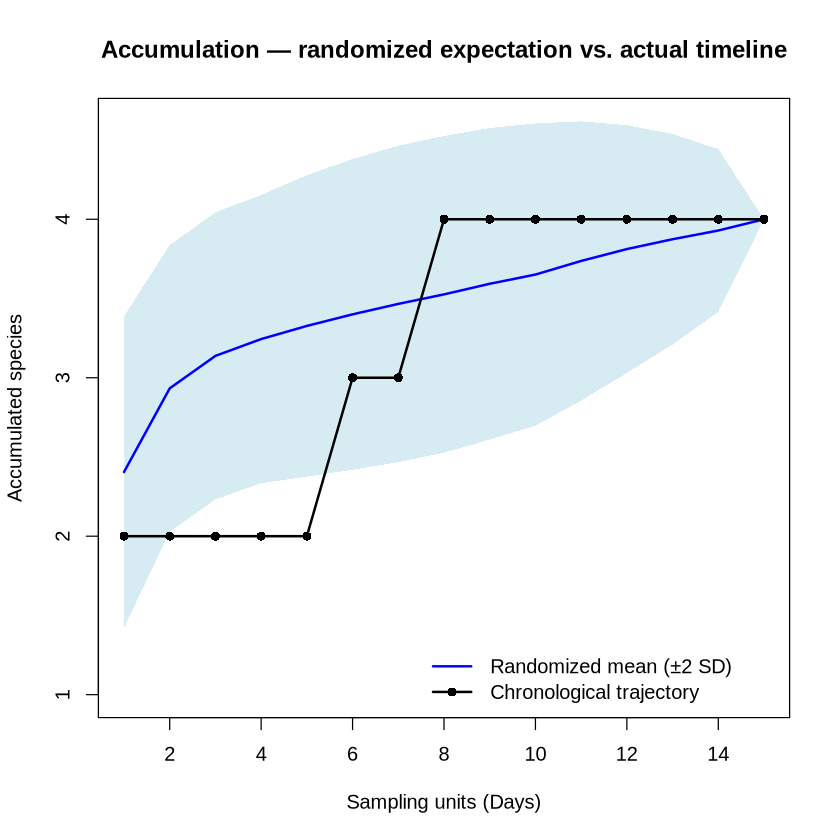

In [42]:
acc_rand <- specaccum(mat_site, method = "random", permutations = 1000)
acc_time <- specaccum(mat_site, method = "collector")

plot(
  acc_rand, ci.type = "poly", ci.lty = 0,
  ci.col = adjustcolor("lightblue", 0.5),
  col = "blue", lwd = 2,
  xlab = "Sampling units (Days)",
  ylab = "Accumulated species",
  main = "Accumulation — randomized expectation vs. actual timeline"
)
lines(acc_time$sites, acc_time$richness, lwd = 2, col = "black")  # chronological overlay
points(acc_time$sites, acc_time$richness, pch = 16)
legend("bottomright",
       c("Randomized mean (±2 SD)", "Chronological trajectory"),
       lwd = c(2, 2), col = c("blue", "black"), pch = c(NA, 16), bty = "n")


In [43]:
# quick comparisom of least number of rows array
# Build a species accumulation curve for one camera trap array

# Pick an array (here: the one with the most records among the 5-year arrays)
selected_array <- df_arrays_5_years %>%
    count(Camera_Trap_Array, name = "n") %>%
    arrange((n)) %>%
    slice(1) %>%
    pull(Camera_Trap_Array)

cat("Selected Camera_Trap_Array:", selected_array, "\n")

Selected Camera_Trap_Array: OakvillePrairie 


In [44]:
# Subset data for that array
df_array <- df_arrays_5_years %>%
    filter(Camera_Trap_Array == selected_array)

# Identify a species column
species_col <- c("Sci_Name")

# Create occurrence (presence/absence) matrix by Year
occurrence <- df_array %>%
    filter(!is.na(.data[[species_col]]), .data[[species_col]] != "", !is.na(Year)) %>%
    distinct(Year, .data[[species_col]]) %>%
    mutate(value = 1) %>%
    pivot_wider(names_from = !!rlang::sym(species_col),
                            values_from = value,
                            values_fill = 0) %>%
    arrange(Year)

mat <- as.data.frame(occurrence)
row_names <- mat$Year
mat$Year <- NULL
rownames(mat) <- row_names

if (ncol(mat) < 1) stop("No species columns created; check filtering logic.")

In [45]:
mat

,odocoileus virginianus,canis latrans,mephitis mephitis,ictidomys tridecemlineatus,mustela erminea,odocoileus hemionus
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2019,1,1,0,0,0,0
2020,1,1,1,0,0,0
2021,1,0,1,1,0,0
2022,1,1,1,0,1,1
2023,1,1,1,0,0,0


'nperm' >= set of all permutations: complete enumeration.

Set of permutations < 'minperm'. Generating entire set.



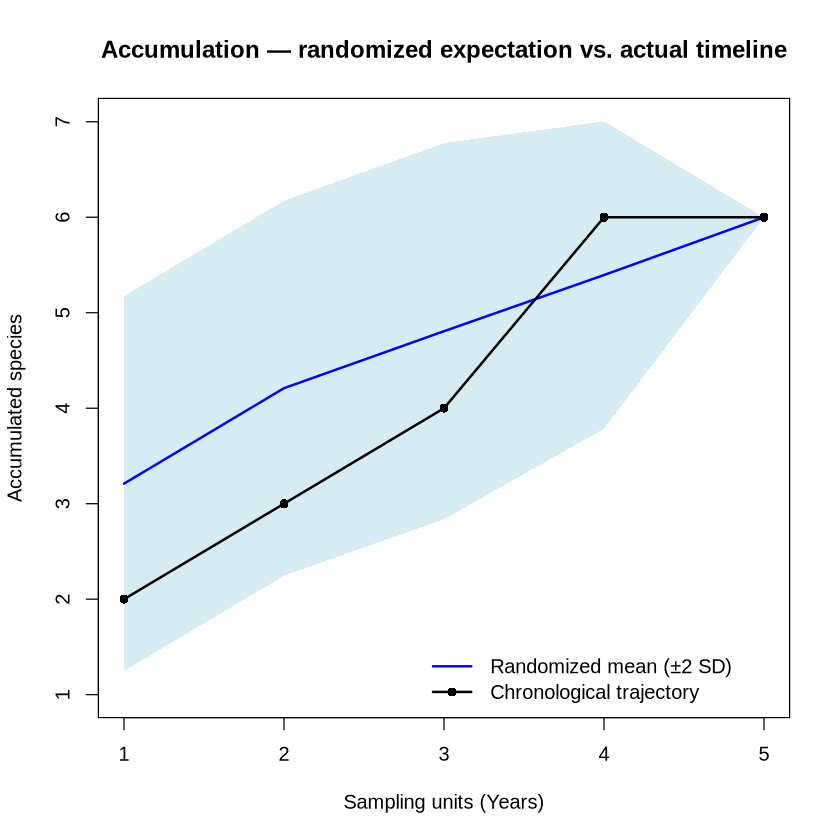

In [46]:
acc_rand <- specaccum(mat, method = "random", permutations = 1000)
acc_time <- specaccum(mat, method = "collector")

plot(
  acc_rand, ci.type = "poly", ci.lty = 0,
  ci.col = adjustcolor("lightblue", 0.5),
  col = "blue", lwd = 2,
  xlab = "Sampling units (Years)",
  ylab = "Accumulated species",
  main = "Accumulation — randomized expectation vs. actual timeline"
)
lines(acc_time$sites, acc_time$richness, lwd = 2, col = "black")  # chronological overlay
points(acc_time$sites, acc_time$richness, pch = 16)
legend("bottomright",
       c("Randomized mean (±2 SD)", "Chronological trajectory"),
       lwd = c(2, 2), col = c("blue", "black"), pch = c(NA, 16), bty = "n")


## Spatial Analysis

In [47]:
# Manually pick camera trap array for example
selected_array <- "Herrera"

In [48]:
# Get list of deployment IDs for selected array in one year
selected_year <- 2020

deployment_ids <- df_arrays_5_years %>%
    filter(Camera_Trap_Array == selected_array, Year == selected_year) %>%
    pull(Deployment_ID) %>%
    unique()

cat("Selected Year:", selected_year, "\n")
cat("Number of deployments:", length(deployment_ids), "\n")

Selected Year: 2020 
Number of deployments: 143 


In [49]:
# Create occurrence matrix by Deployment_ID for the selected array and year
df_selected <- df_arrays_5_years %>%
    filter(Camera_Trap_Array == selected_array, Year == selected_year)

occurrence_by_deployment <- df_selected %>%
    filter(!is.na(.data[[species_col]]), .data[[species_col]] != "", !is.na(Deployment_ID)) %>%
    distinct(Deployment_ID, .data[[species_col]]) %>%
    mutate(value = 1) %>%
    pivot_wider(names_from = !!rlang::sym(species_col),
                values_from = value,
                values_fill = 0) %>%
    arrange(Deployment_ID)

mat_deployment <- as.data.frame(occurrence_by_deployment)
row_names <- mat_deployment$Deployment_ID
mat_deployment$Deployment_ID <- NULL
rownames(mat_deployment) <- row_names

head(mat_deployment)

,odocoileus virginianus,vulpes vulpes,procyon lotor,sciurus carolinensis,sylvilagus floridanus,tamias striatus,peromyscus leucopus,didelphis virginiana,sciurus niger,marmota monax
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HH0101,1,1,1,1,1,0,0,0,0,0
HH0102,1,1,1,1,1,0,0,0,0,0
HH0103,0,1,0,1,0,0,0,0,0,0
HH0104,0,0,1,1,1,1,0,0,0,0
HH0105,0,0,1,0,0,0,0,0,0,0
HH0108,0,1,1,1,0,0,0,0,0,0


Observed richness: 10 


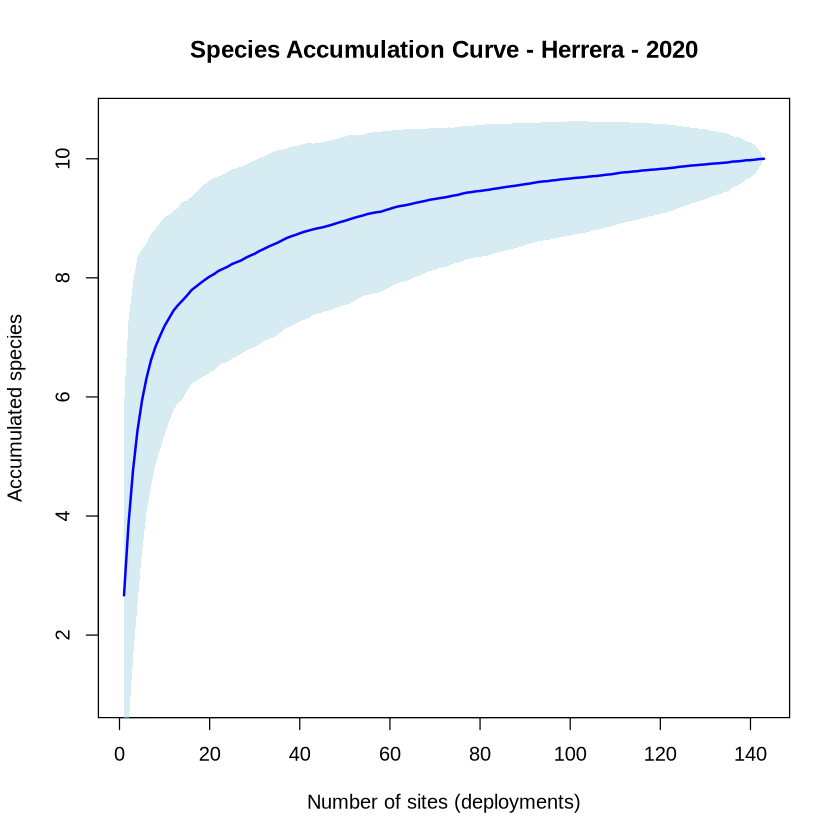

In [50]:
# Species accumulation (randomized)
set.seed(42)
acc <- specaccum(mat_deployment, method = "random", permutations = 1000)

# Plot
plot(
    acc,
    ci.type = "poly",
    col = "blue",
    lwd = 2,
    ci.lty = 0,
    ci.col = adjustcolor("lightblue", 0.5),
    xlab = "Number of sites (deployments)",
    ylab = "Accumulated species",
    main = paste("Species Accumulation Curve -", selected_array, "-", selected_year)
)

# Simple richness estimate
cat("Observed richness:", tail(acc$richness, 1), "\n")

### Site SAC

In [51]:
  # Required packages

  library(dplyr)
  library(tidyr)
  library(lubridate)
  library(vegan)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [52]:
sac_for_site <- function(
  df,
  species_col,
  selected_array,
  selected_site,
  array_col      = "Camera_Trap_Array",
  site_col = "Deployment_ID",
  start_col      = "Start_Date",
  end_col        = "End_Date",
  end_time_col   = "End_Time"
) {


  # ---- Filter to the selected array + deployment
  df_dep <- df %>%
    dplyr::filter(.data[[array_col]] == selected_array,
                  .data[[site_col]] == selected_site)

  if (nrow(df_dep) == 0) {
    stop("No rows found for the selected array/deployment.")
  }

  # ---- Parse dates
  start_date <- suppressWarnings(min(as.Date(df_dep[[start_col]]), na.rm = TRUE))
  end_date   <- suppressWarnings(max(as.Date(df_dep[[end_col]]),   na.rm = TRUE))
  if (is.na(start_date) || is.na(end_date) || start_date > end_date) {
    stop("Invalid or missing Start_Date/End_Date for the selected deployment.")
  }

  # ---- Build full daily grid (assumes camera was out for this entire window)
  days_grid <- tibble::tibble(Date = seq(start_date, end_date, by = "day"))

  # ---- Collapse detections to daily presence per species (from End_Time)
  #      Keep only non-empty species values with valid End_Time
  df_dep <- df_dep %>%
    mutate(
      End_Time_parsed = lubridate::ymd_hms(.data[[end_time_col]], quiet = TRUE),
      DateFromEnd     = as.Date(End_Time_parsed)
    )

  present_by_day <- df_dep %>%
    filter(!is.na(.data[[species_col]]), .data[[species_col]] != "",
           !is.na(DateFromEnd)) %>%
    transmute(Date = DateFromEnd, species = .data[[species_col]]) %>%
    distinct(Date, species) %>%
    mutate(present = 1L) %>%
    tidyr::pivot_wider(names_from = species, values_from = present, values_fill = 0) %>%
    arrange(Date)

  # ---- Join detections onto full sampled window; fill NAs with 0 for species cols
  pa_full <- days_grid %>%
    left_join(present_by_day, by = "Date") %>%
    arrange(Date)

  species_cols <- setdiff(names(pa_full), "Date")
  if (length(species_cols) == 0) {
    # No detections at all: keep a dummy column so downstream won't error
    pa_full$`__NO_DETECTIONS__` <- 0L
    species_cols <- "__NO_DETECTIONS__"
  }
  pa_full[species_cols] <- lapply(pa_full[species_cols], function(x) {
    x[is.na(x)] <- 0L
    as.integer(x)
  })

  # ---- Build day x species matrix (rows chronologically ordered)
  mat_site <- pa_full %>%
    select(Date, dplyr::all_of(species_cols)) %>%
    arrange(Date)

  row_names <- as.character(mat_site$Date)
  mat_site$Date <- NULL
  mat_site <- as.data.frame(mat_site, check.names = TRUE)
  rownames(mat_site) <- row_names

  # ---- Chronological SAC (collector uses row order as given)
  acc_curve <- vegan::specaccum(as.matrix(mat_site), method = "collector")

  # ---- Return both
  list(
    acc_curve = acc_curve,
    matrix    = mat_site,
    info      = list(
      array_id     = selected_array,
      deployment_id= selected_site,
      trap_nights  = nrow(mat_site),
      n_species    = ncol(mat_site),
      date_range   = c(min(row_names), max(row_names))
    )
  )
}


In [53]:
selected_array <- "Herrera"
selected_site <- "DC_COCanal1 09/03/2021"
# selected_site <- "MH0704"

In [54]:
res <- sac_for_site(df_arrays_5_years, species_col = "Sci_Name",
                    selected_array = selected_array,
                    selected_site = selected_site)

In [55]:
res$matrix

,castor canadensis,canis latrans,procyon lotor,vulpes vulpes,odocoileus virginianus
,<int>,<int>,<int>,<int>,<int>
2021-09-03,1,0,0,0,0
2021-09-04,1,0,0,1,1
2021-09-05,1,0,0,0,0
2021-09-06,1,0,0,0,1
2021-09-07,1,0,0,0,1
2021-09-08,1,0,0,0,1
2021-09-09,1,0,0,0,1
2021-09-10,1,0,0,0,0
2021-09-11,1,0,0,0,0


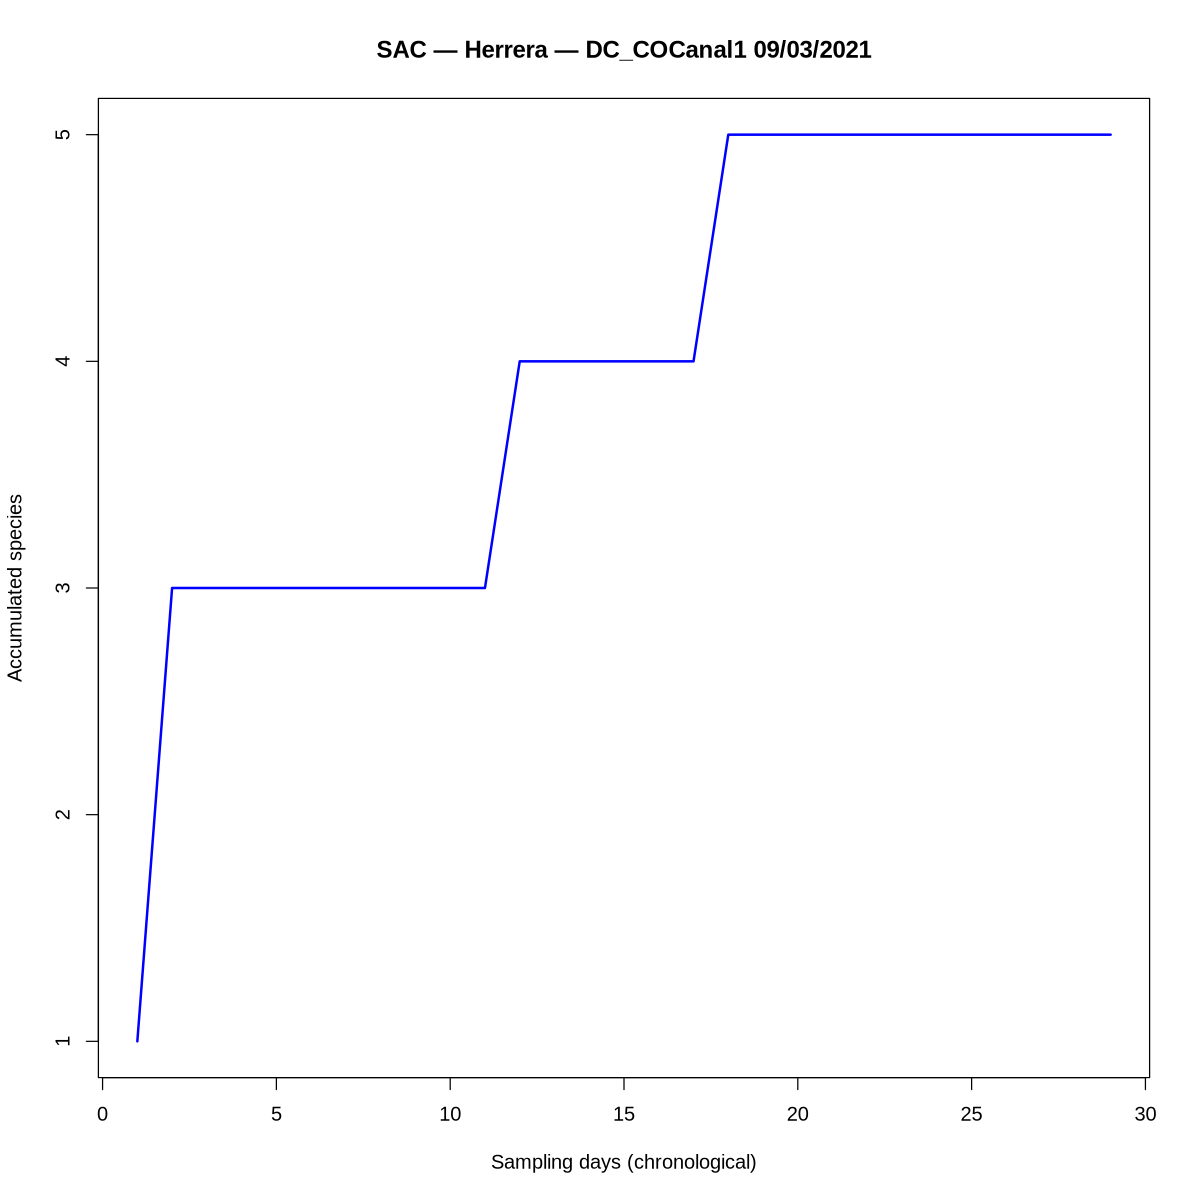

In [56]:
options(repr.plot.width = 10, repr.plot.height = 10)
plot(
    res$acc_curve,
    col = "blue",
    lwd = 2,
    xlab =  "Sampling days (chronological)",
    ylab = "Accumulated species",
    main = paste("SAC —", res$info$array_id, "—", res$info$deployment_id))


In [57]:
sac_quality <- function(mat, target = 0.90, slope_thresh = 0.02) {
  # mat: rows = effort steps (days or sites, in chronological order), cols = species (0/1)
  if (!requireNamespace("vegan", quietly = TRUE)) stop("Install 'vegan'")

  acc <- vegan::specaccum(as.matrix(mat), method = "collector")
  x <- acc$sites
  y <- acc$richness

  # Guard: need some richness > 0 to fit
  ok <- y > 0
  if (sum(ok) < 3L) {
    return(list(
      value = NA_real_, pass = FALSE,
      reason = "Too few positive points to fit Clench",
      metrics = c(completeness = NA, slope_last = NA),
      params = c(S_inf = NA, K = NA)
    ))
  }
  df <- data.frame(x = x[ok], y = y[ok])

  # Linearized starts for Clench: y = S∞ x / (K + x)  =>  x/y = (1/S∞) x + K/S∞
  lin <- lm(I(x/y) ~ x, data = df)
  Se0 <- 1 / coef(lin)[["x"]]
  K0  <- coef(lin)[["(Intercept)"]] * Se0
  # Constrain positive params and S∞ >= max observed
  Se0 <- max(Se0, max(df$y) + 1e-6)
  K0  <- max(K0, 1e-6)

  nls_fit <- nls(
    y ~ Se * x / (K + x),
    data = df,
    start = list(Se = Se0, K = K0),
    algorithm = "port",
    lower = c(Se = max(df$y), K = 1e-6),
    control = nls.control(maxiter = 200, warnOnly = TRUE)
  )
  co <- coef(nls_fit); Se <- unname(co["Se"]); K <- unname(co["K"])

  xlast <- tail(acc$sites, 1)
  ylast <- tail(acc$richness, 1)

  completeness <- as.numeric(ylast / Se)
  slope_last   <- as.numeric((Se * K) / (K + xlast)^2)   # species per effort-unit
  extra_one    <- 1 / slope_last                         # effort for +1 species
  N90 <- 9 * K; N95 <- 19 * K
  add90 <- max(0, N90 - xlast); add95 <- max(0, N95 - xlast)

  score <- 100 * (0.7 * pmin(1, completeness) + 0.3 * (1 - pmin(1, slope_last / slope_thresh)))
  pass  <- (completeness >= target) && (slope_last <= slope_thresh)

  list(
    value   = completeness,     # <-- single-number 'goodness'
    pass    = pass,
    score   = score,            # optional 0–100 composite
    metrics = c(
      completeness = completeness,
      slope_last   = slope_last,
      extra_effort_for_plus1 = extra_one,
      effort_90pct = N90, add_to_90 = add90,
      effort_95pct = N95, add_to_95 = add95
    ),
    params  = c(S_inf = Se, K = K),
    fit     = nls_fit
  )
}


In [58]:
q <- sac_quality(res$matrix)

q$value         # e.g., 0.92  (≥0.90 ≈ "good")
q$pass          # TRUE/FALSE based on thresholds
q$metrics       # slopes & effort-to-90/95% for contex

[1] 0.8639087

[1] FALSE

completeness             slope_last extra_effort_for_plus1 
            0.86390868             0.02534961            39.44833801 
          effort_90pct              add_to_90           effort_95pct 
           45.81080383            16.81080383            96.71169698 
             add_to_95 
           67.71169698

In [59]:
plot_multiple_sites <- function(
    df,
    species_col,
    selected_array,
    site_ids,
    array_col = "Camera_Trap_Array",
    site_col = "Deployment_ID",
    start_col = "Start_Date",
    end_col = "End_Date",
    end_time_col = "End_Time",
    ncol = 3,
    width = 5,
    height = 5
) {
    n_sites <- length(site_ids)
    if (n_sites == 0) {
        stop("No site IDs provided")
    }

    # Calculate grid dimensions
    nrow <- ceiling(n_sites / ncol)

    # Set up the plotting device with specified dimensions
    options(repr.plot.width = width * ncol, repr.plot.height = height * nrow)
    
    # Set up the plotting area
    par(mfrow = c(nrow, ncol), mar = c(4, 4, 3, 1))

    # Plot each site
    for (site_id in site_ids) {
        tryCatch({
            res <- sac_for_site(
                df = df,
                species_col = species_col,
                selected_array = selected_array,
                selected_site = site_id,
                array_col = array_col,
                site_col = site_col,
                start_col = start_col,
                end_col = end_col,
                end_time_col = end_time_col
            )

            plot(
                res$acc_curve,
                col = "blue",
                lwd = 2,
                xlab = "Sampling days (chronological)",
                ylab = "Accumulated species",
                main = paste("SAC —", res$info$array_id, "—", res$info$deployment_id)
            )
        }, error = function(e) {
            plot.new()
            text(0.5, 0.5, paste("Error:", site_id), cex = 0.8)
        })
    }

    # Reset plotting parameters
    par(mfrow = c(1, 1), mar = c(5, 4, 4, 2) + 0.1)
}

In [60]:
# Get all unique deployment IDs for Herrera array
herrera_deployments <- df_arrays_5_years %>%
    filter(Camera_Trap_Array == "Herrera") %>%
    pull(Deployment_ID) %>%
    unique()

cat("Number of unique deployments in Herrera:", length(herrera_deployments), "\n")

Number of unique deployments in Herrera: 356 


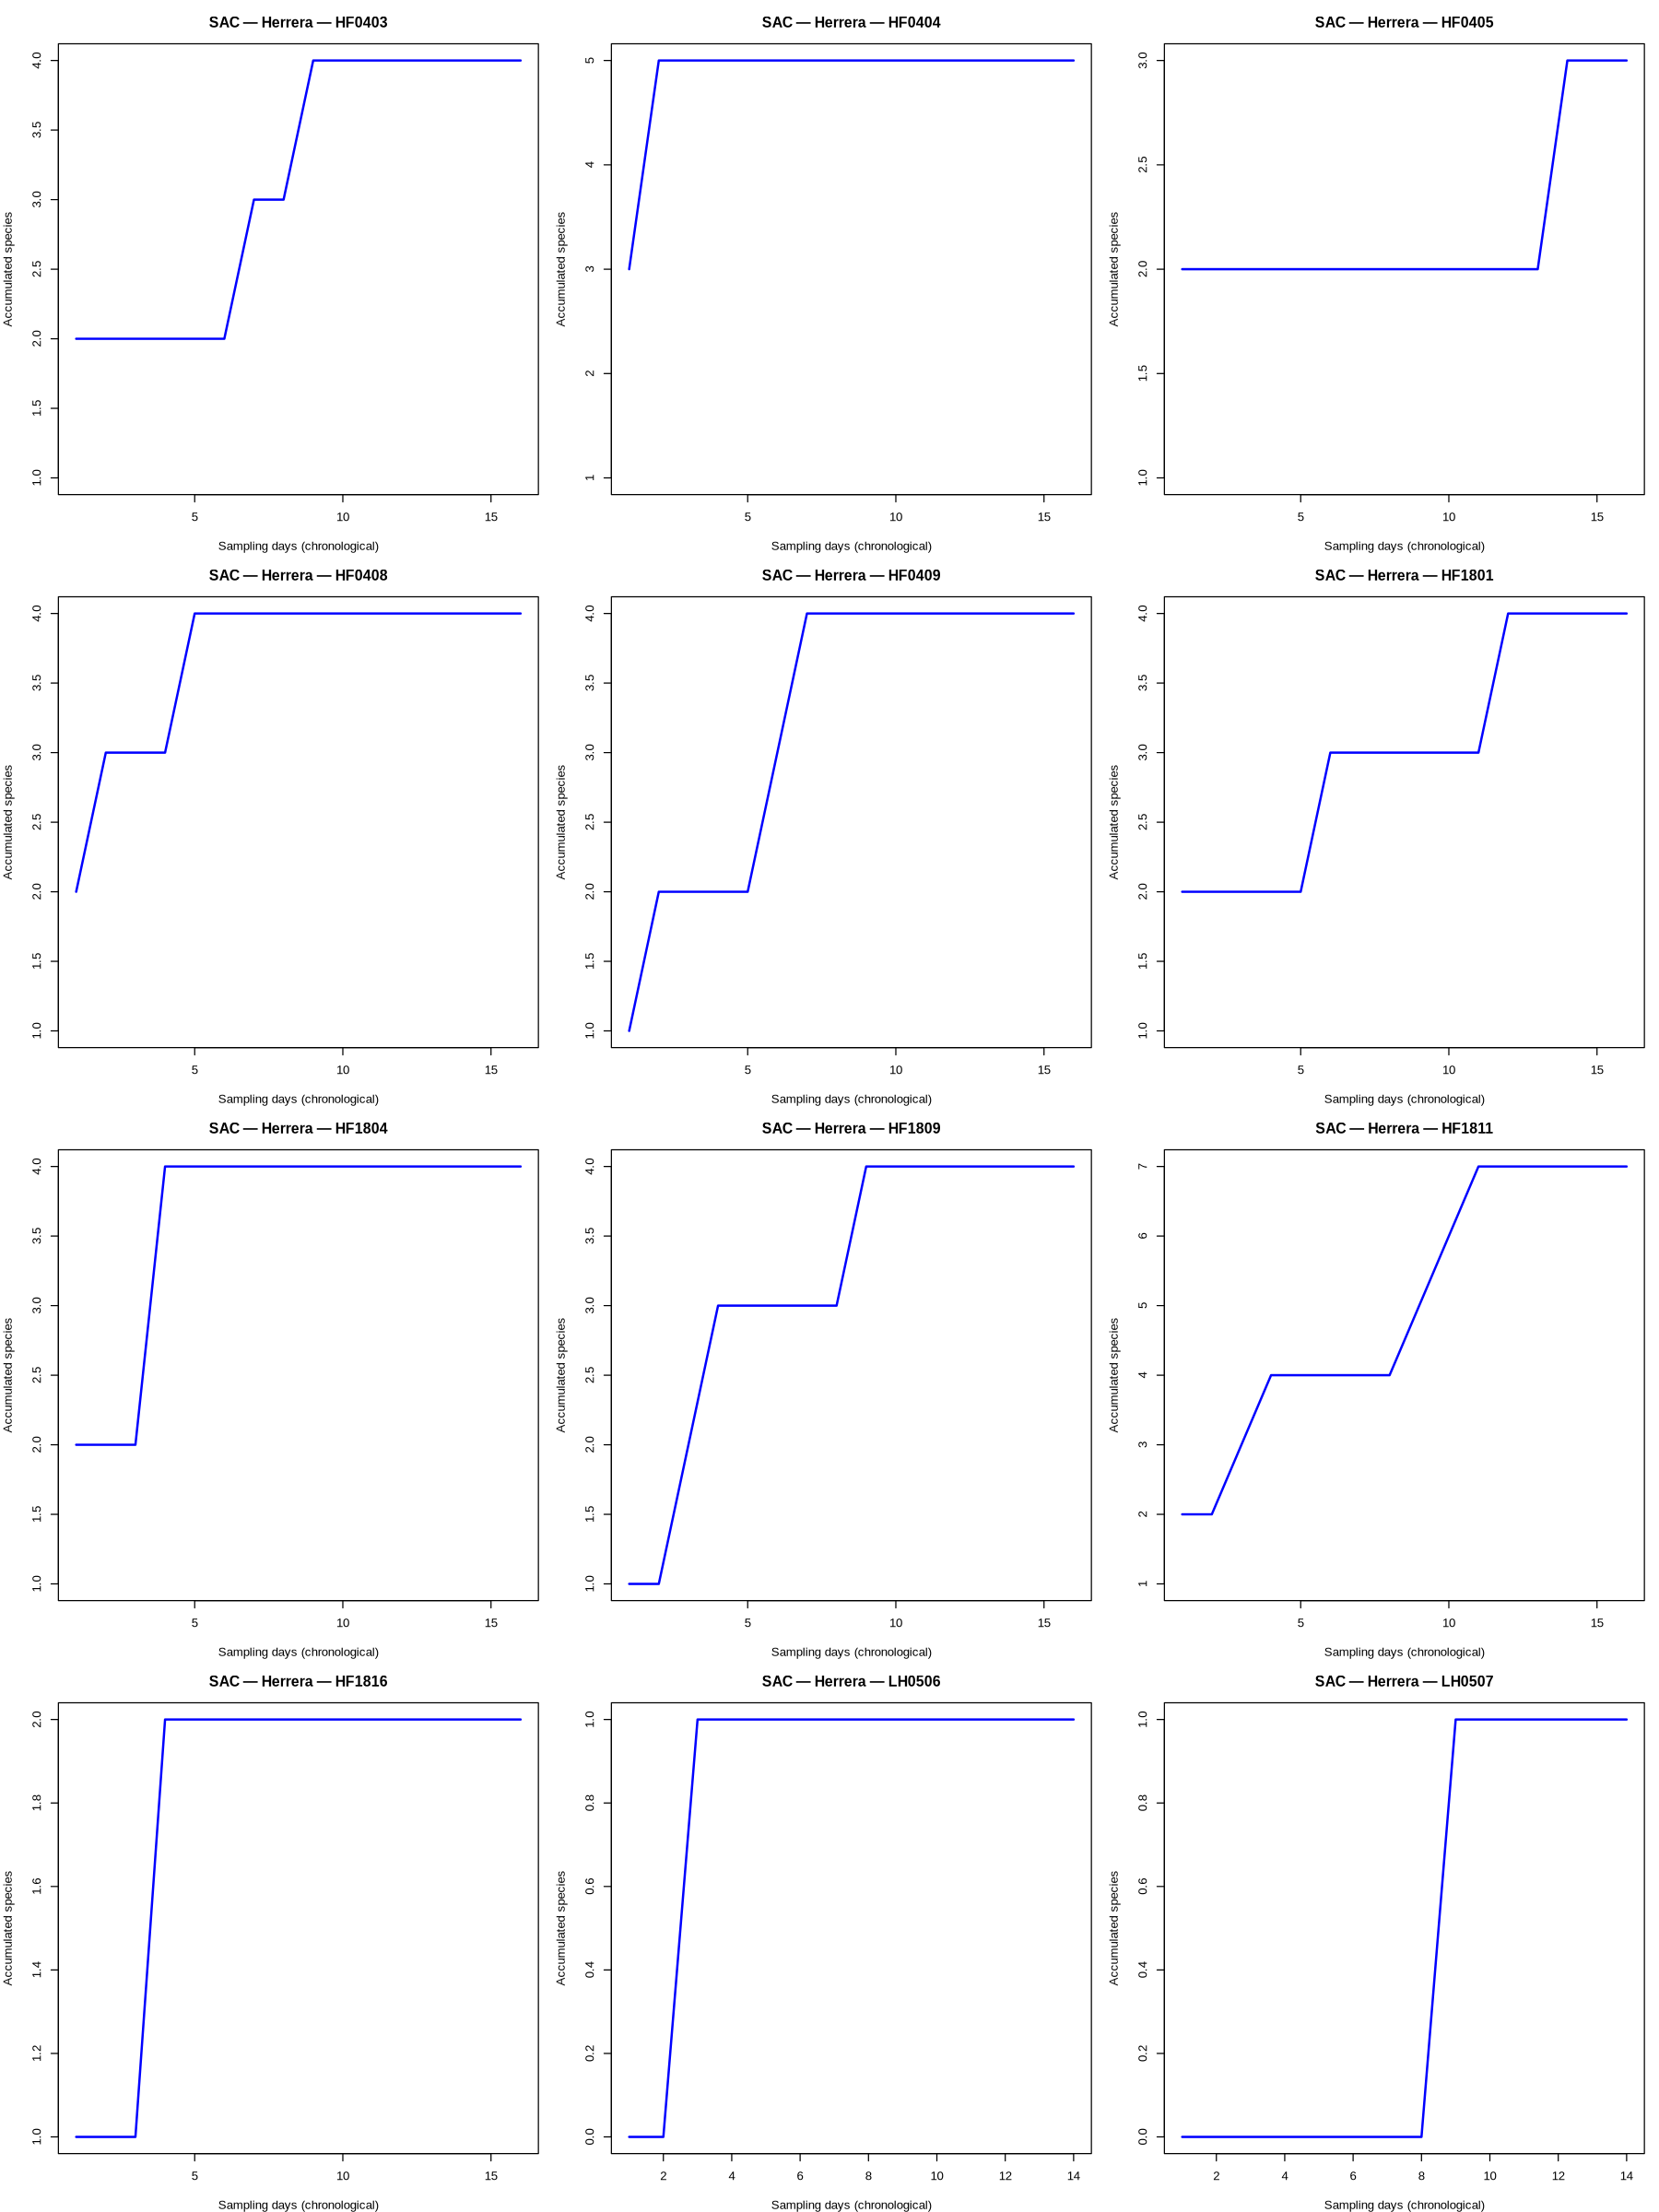

In [61]:
plot_multiple_sites(
    df = df_arrays_5_years,
    species_col = "Sci_Name",
    selected_array = "Herrera",
    site_ids = herrera_deployments[1:12],
    ncol = 3
)

In [62]:
# Find top 9 Herrera deployments with most rows
top_herrera_deployments <- df_arrays_5_years %>%
    filter(Camera_Trap_Array == "Herrera") %>%
    count(Deployment_ID, name = "n_records") %>%
    arrange(desc(n_records)) %>%
    slice(1:12) %>%
    pull(Deployment_ID)

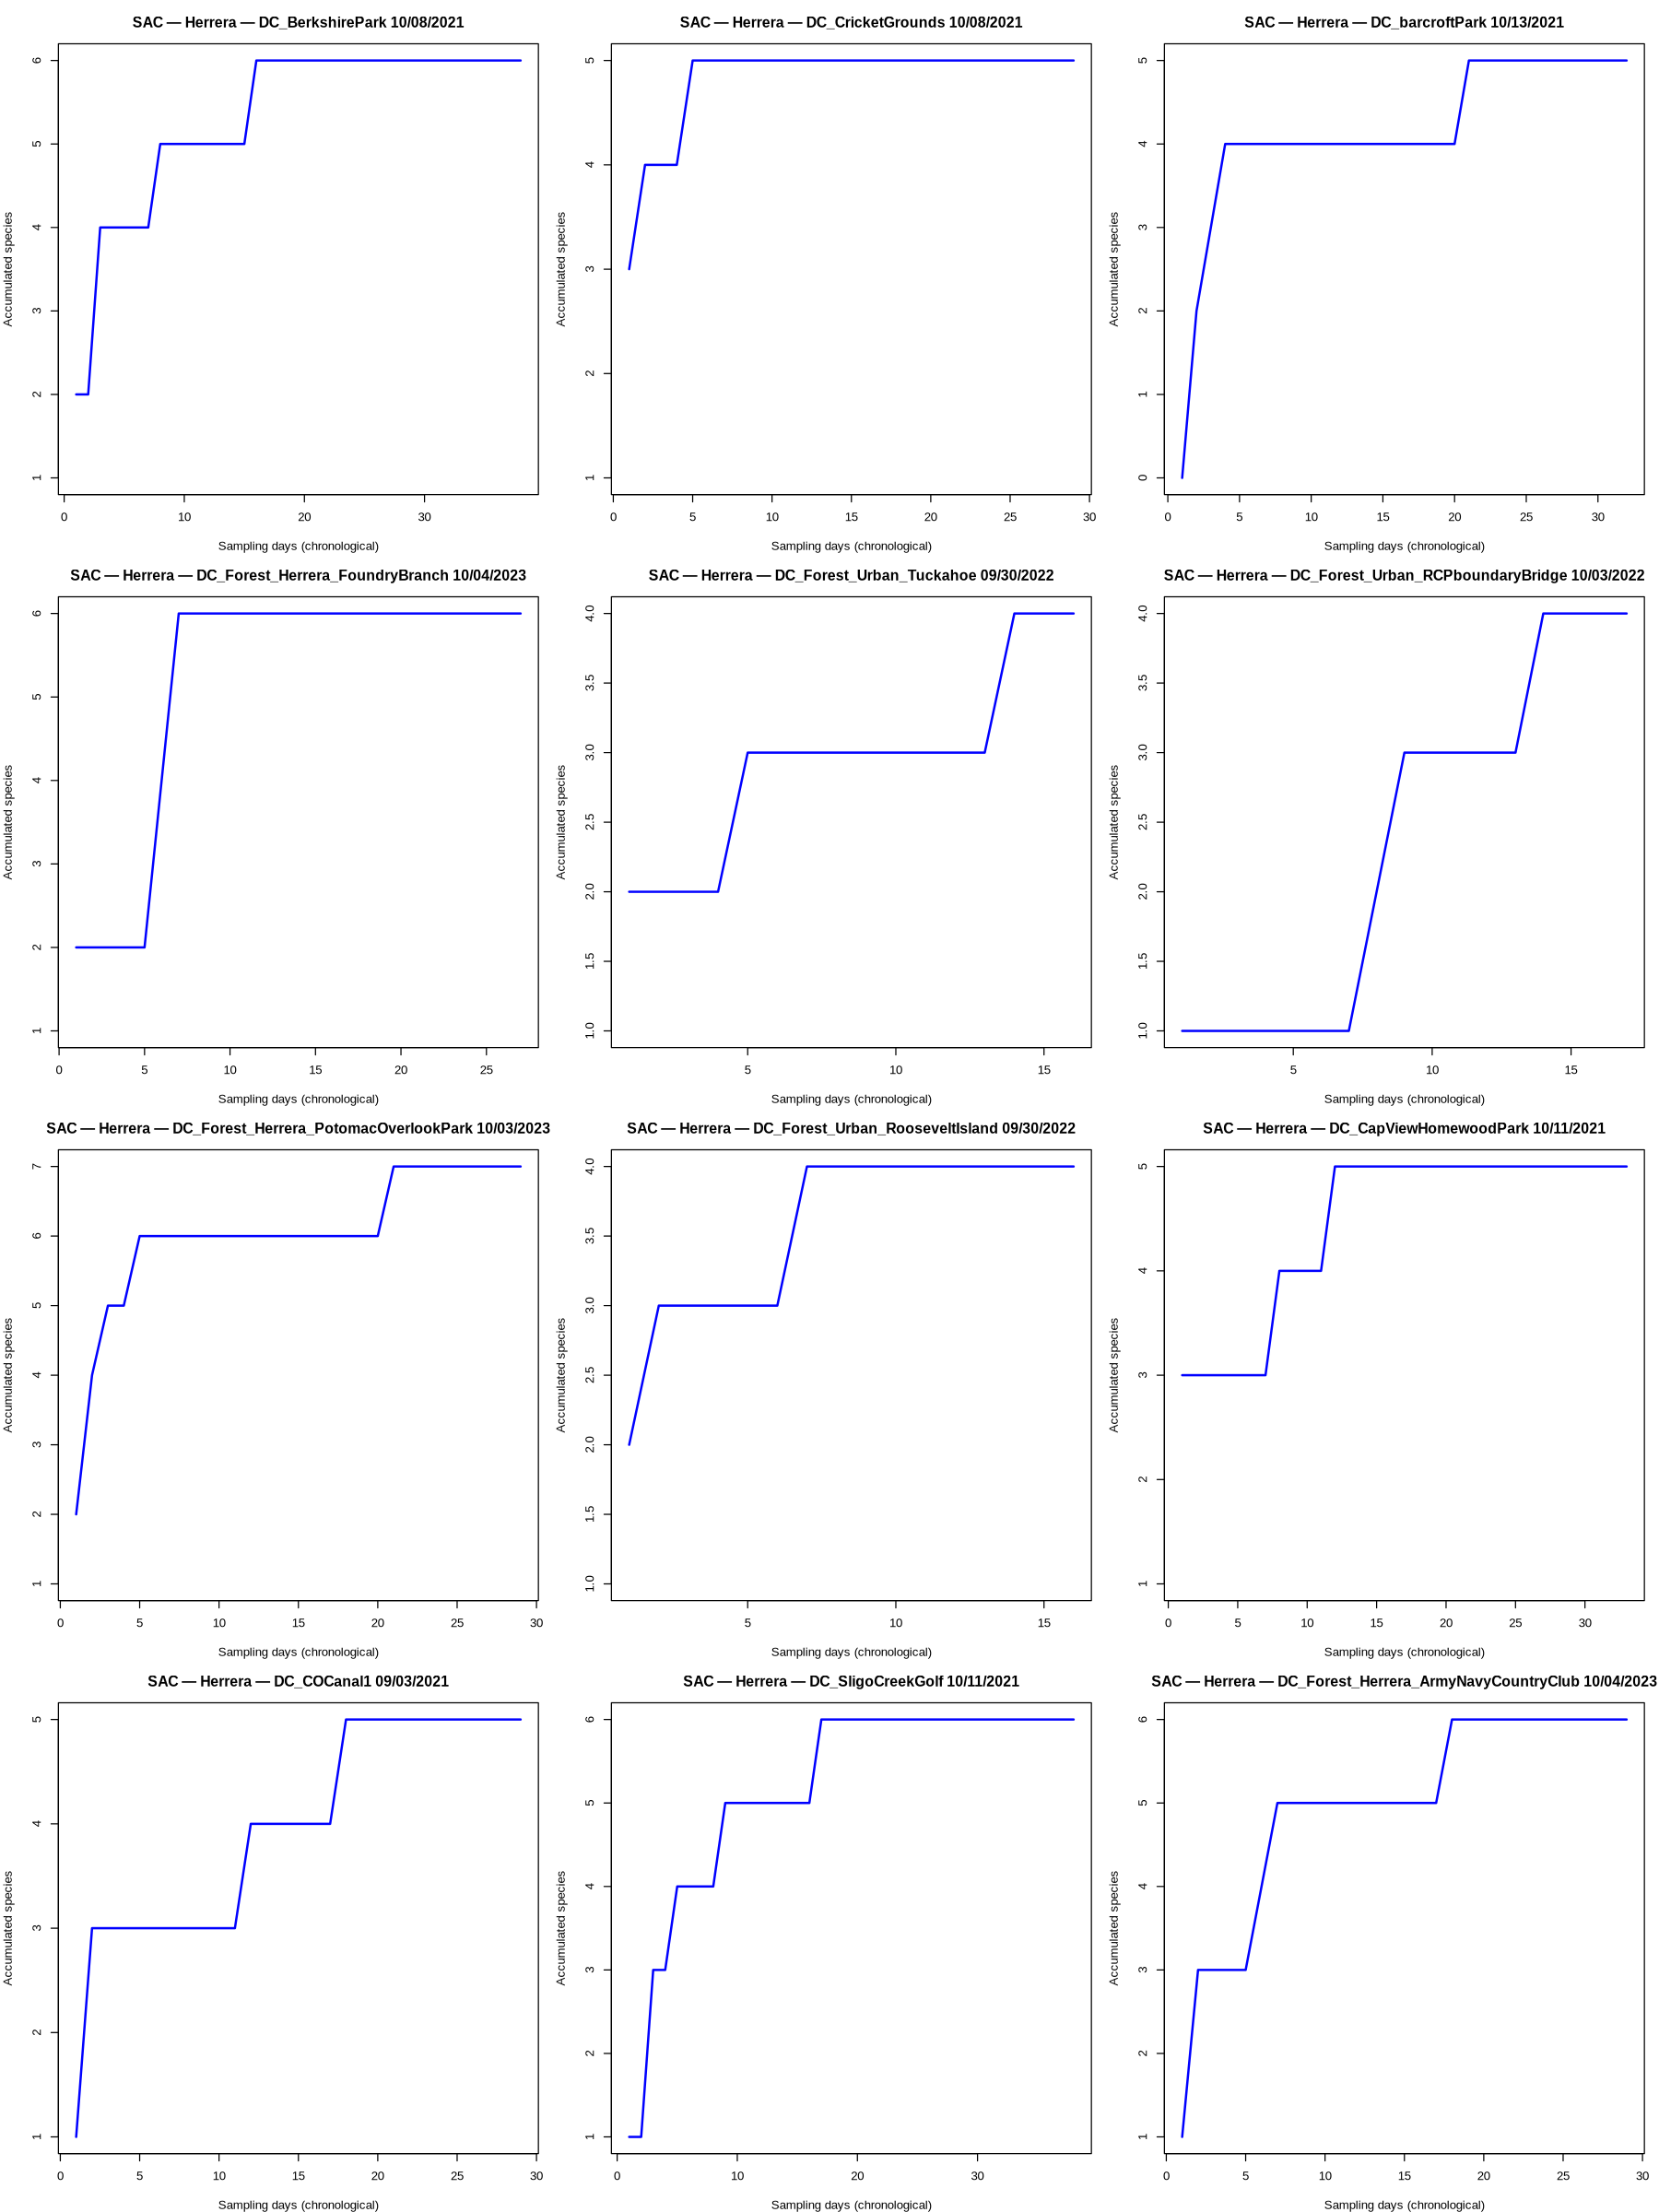

In [63]:
plot_multiple_sites(
    df = df_arrays_5_years,
    species_col = "Sci_Name",
    selected_array = "Herrera",
    site_ids = top_herrera_deployments,
    ncol = 3
)